In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm

In [15]:
def fft_freq_clipping(f_FFT: np.ndarray, f_low, f_high):
    """Clip an FFT frequency bin by frequency lower bounds and upper bounds."""
    f_low_idx, f_high_idx = -1, -1
    if f_low <= f_FFT[0]:
        f_low_idx = 0
    if f_high >= f_FFT[-1]:
        f_high_idx = len(f_FFT)
    for i in range(len(f_FFT) - 1):
        if f_FFT[i] < f_low and f_FFT[i+1] >= f_low:
            f_low_idx = i + 1
        if f_FFT[i] <= f_high and f_FFT[i+1] > f_high:
            f_high_idx = i + 1
    if f_low_idx == -1 or f_high_idx == -1:
        raise RuntimeError('Incorrect FFT frequency bound')

    return f_low_idx, f_high_idx

In [10]:
clean = np.abs(np.load("stft_object_clipping.npy"))
print(clean.shape)

(2, 300, 36, 256)


In [23]:
clean_drill = clean[0,1,:,:]
clean_shaver = clean[1,0,:,:]

In [24]:
f_low = 16000
f_high = 40000
window_len = 1024
fs = 96000
f_FFT = np.linspace(0, fs / 2, window_len // 2 + 1)
f_low_idx,f_high_idx = fft_freq_clipping(f_FFT, f_low, f_high)
f_FFT = f_FFT[f_low_idx:f_high_idx]

Text(0, 0.5, 'Frequency(Hz)')

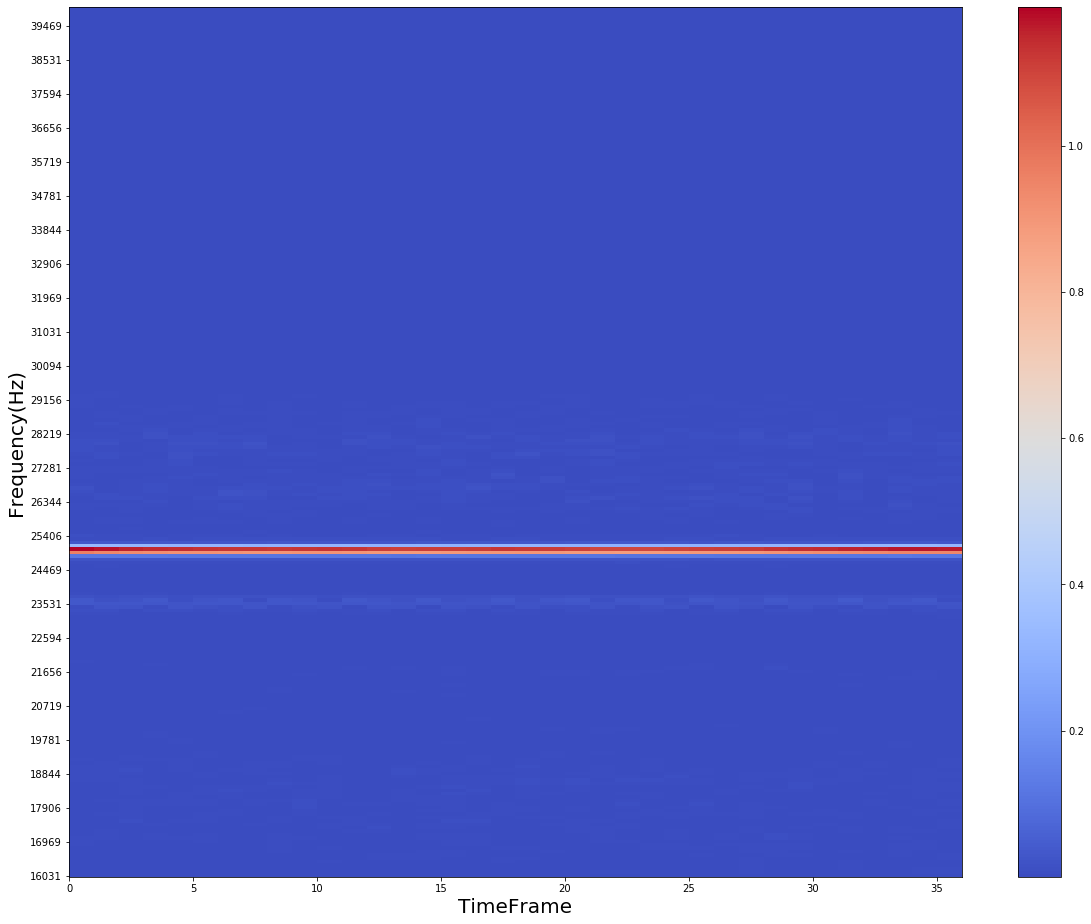

In [25]:
fig,ax = plt.subplots(figsize=(20,16))
img = ax.imshow(clean_drill.T,aspect="auto",origin="lower",cmap=cm.coolwarm,extent=[0,clean.shape[2],f_low,f_high])
fig.colorbar(img,ax=ax)
ax.set_yticks(f_FFT[0:-1:10])
ax.set_xlabel("TimeFrame",fontsize=20)
ax.set_ylabel("Frequency(Hz)",fontsize=20)

In [ ]:
separated_drill = np.abs(np.load(""))